# Comentarii


Mulțumesc frumos pentru projectul tău! Mă bucur că ați încercat asta; avem un cazul particular cu sistemul $2 \times 2$, totuși împlementarea nu este trivial.

Din punctul meu de vedere soluția este correcta și completa; am văzut cum este construita soluție progresiv. Sper că cu exercițiul asta lucrurile din curs au devenit mai lămurit. 

La cursul au fost prezentat diferite metode. Metoda "ecuației caracteristice" ne aduce  prin ansatz $y(x) = \mathrm{e}^{cx} \implies y'(x) = c y(x)$ de la ecuație diferențial la ecuație algebrice, folosind faptul că scriem $y(x)$ nu că o singura funcție, dar că un vectorul de funcție, $y(x) = (y_1(x), \dots, y_n(x))$. (Și la cursul a fost aratat că $y(x)$ este într-adevar un element in un spațiu vectorial).

Din punctul de vedere practic dorim să scriem un program care ne dau soluție sistemului homogen, de exemplu pentru 3 funcție $y_1(x), y_2(x), y_3(x)$. (Sisteme nehomogene sunt "ușoare" când avem soluție homogena prin metoda "variaței constante").

\begin{align*}
\left( \begin{matrix} y_1'(x) \\ y_2'(x) \\ y_3'(x)  \end{matrix} \right) 
= \left( \begin{matrix} 
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} \\
\end{matrix} \right)  
\left( \begin{matrix} y_1(x) \\ y_2(x) \\ y_3(x)   \end{matrix} \right) && \{a_{ij}\}_{1 \leq ij \leq 3} \in \mathbb{C}
\end{align*}

Hai să suponem că este diagonalizabil, dupa asta generalizarea la "formă lui Jordan" nu e grea.

Adică input ar fi o matrice, si da ca output un vector cu soluția pentru fiecare funcție. ceva din genul

~~~{.python}
def myDESolver(coefficient_matrix):
    # check it is diagonalizable
    if ( coefficient_matrix.is_diagonalizable() == False ): return -1
    
    # the dimension of sistem, ie. number of functions
    n = coefficient_matrix.nrows()
    
    # the list with the functions to be returned
    solution_vector = vector([function('y'+str(k))(x) for k in [1..n]])
    ....
    return solution_vector
~~~

Ecuație este $\mathbf y' = A \mathbf y$, si ii-scriem matrice cu coeffiecentele că 

\begin{align*}
T^{-1} A T = \mathrm {diag}(\lambda_1, \dots, \lambda_n) 
\end{align*}

pentru o $n \times n$ matrice $T$. La diagonal avem valorii propri, $\lambda_1, \dots, \lambda_n$. Matrice $T$ găsim-o cu `jordan_form(...)`.

~~~
T = coefficient_matrix.jordan_form(transformation=True)[1]
~~~

Definim vectorul

\begin{align*}
\mathbf z = T^{-1} \mathbf y,
\end{align*}

care ne aduce la ecuație

\begin{align*}
\mathbf z' = \mathrm{diag}(\lambda_1, \dots, \lambda_n) \mathbf z
\end{align*}

Soluția pentru $\mathbf z$ este ușor. Dacă avem că condiție inițiale $\mathbf z(0) = \mathbf z_0$ atunci

\begin{align*}
\mathbf z = \mathrm{diag} (\mathrm e^{\lambda_1}, \dots, \mathrm e^{\lambda_n}) \mathbf z_0
\end{align*}

Adică

\begin{align*}
\mathbf y &= T \mathbf z \\
&= T (\mathrm{diag} (\mathrm e^{\lambda_1}, \dots, \mathrm e^{\lambda_n}) \mathbf z_0)  \\
&= T \mathrm{diag} (\mathrm e^{\lambda_1}, \dots, \mathrm e^{\lambda_n})  \left( T^{-1} \mathbf y_0 \right) \\
&= (T \mathrm{diag} (\mathrm e^{\lambda_1}, \dots, \mathrm e^{\lambda_n})  T^{-1} ) \mathbf y_0
\end{align*}

Codul arata așa

In [1]:
def myDESolver(coefficient_matrix, initial_conditions, x = var):
    
    # check it is diagonalizable
    if ( coefficient_matrix.is_diagonalizable() == False ): return -1
    
    # the dimension of sistem, ie. number of functions
    n = coefficient_matrix.nrows()
    
    # the list with the functions to be returned
    ## the variable is called here "x"  but it maches the "var" as passed by the user
    y_sol = vector([function('y'+str(k))(x) for k in [1..n]])
    
    # put a vector with initial conditions
    ## initial_conditions = [y1(0), y2(0), ..., yn(0)]
    y_0 = vector(initial_conditions)
    
    # compute the Jordan transformation matrix
    T = coefficient_matrix.jordan_form(transformation=True)[1]
    
    # compute diagonal matrix with eigenvalues, D = (lambda_1, ....., lambda_n)
    D = T.inverse() * coefficient_matrix * T
    
    # compute the exponential of the diagonal matrix
    DExp = e^(D*x) 
    
    # compute the solution
    y_sol = T * DExp * T.inverse() * y_0
    
    # return the solution
    return y_sol

Hai să incercam un sistem, de exemplu

\begin{align*}
\left( \begin{matrix} y_1'(t) \\ y_2'(t) \\ y_3'(t)  \end{matrix} \right) 
= \left( \begin{matrix} 
1 & 2 & 0 \\
2 & 1 & 0 \\
0 & 0 & 1 \\
\end{matrix} \right)  
\left( \begin{matrix} y_1(t) \\ y_2(t) \\ y_3(t)   \end{matrix} \right)
&&
\left( \begin{matrix} y_1(0) \\ y_2(0) \\ y_3(0)   \end{matrix} \right) = \left( \begin{matrix} a \\ b \\ c \end{matrix} \right)
\end{align*}


In [2]:
example = matrix(QQ, [[1,2,0], [2,1,0], [0,0,1] ])
var('t, a,b,c')

sol = myDESolver(example, [a,b,c], t)
y_1(t) = sol[0]; y_2(t) = sol[1]; y_3(t) = sol[2]; 

show(y_1(t))
show(y_2(t))
show(y_3(t))

1/2*a*(e^(3*t) + e^(-t)) + 1/2*b*(e^(3*t) - e^(-t))

1/2*b*(e^(3*t) + e^(-t)) + 1/2*a*(e^(3*t) - e^(-t))

c*e^t

## Soluție numerice

Discuția asta este si important pentru soluție numerice nu numai de ecuație liniare, dar cu ecuație neliniare. Te am trimit un attachment cu câteva paginii din *Numerical Recipes*. Sper că să fie interesant :)

-------------

Scopul acestei aplicații este încercarea de a rezolva un sistem de 2 ecuații diferențiale de ordinul 1 fără a utiliza instrucțiunea "desolve_system". Am încercat să fac o soluție astfel încat dacă se schimbă sistemul să fie cât mai ușor de modificat programul ulterior (spre exemplu am încercat să utilizez .coefficient() în loc să scriu eu manual coeficientul la matrice). Nu mi-a ieșit chiar 100%, și bineînțeles că programul va merge doar pentru ecuații de 2 necunoscute, cu coeficienți constanți pentru care ecuația caracteristica are 2 rădăcini reale distince, dar sunt destul de mulțumit de rezultat. 
Pentru aplicație, am ales ca exercițiu de suport exercitiul 1, subpunctul a) din laboratorul 3.

\begin{cases} \large x'(t)= x(t) + 4y(t) \\ \large y'(t)= x(t) + y(t)\end{cases}

Mai întâi, vom declara variabilele, funcțiile și ecuațiile, ca să le avem memorate undeva

In [1]:
var("t")
x=function("x")(t)
y=function("y")(t)
equation_1=diff(x,t)==x+4*y
equation_2=diff(y,t)==x+y
system_1=[equation_1,equation_2]
show(system_1[0])
show(system_1[1])

diff(x(t), t) == x(t) + 4*y(t)

diff(y(t), t) == x(t) + y(t)

Observăm că sistemul nostru este de gradul 1 cu coeficienții funcțiilor x și y constante. Deci, putem încerca rezolvarea sistemului prin metoda ecuației caracteristice. 

Pentru asta, vom crea mai întâi matricea sistemului:

In [2]:
s=system_1 #am dat o denumire mai scurta pentru a nu fi foarte incarcata urmatoarea linie (tot e incarcata)
system_matrix=matrix([[s[0].rhs().coefficient(x),s[0].rhs().coefficient(y)],[s[1].rhs().coefficient(x),s[1].rhs().coefficient(y)]])
show(system_matrix)

[1 4]
[1 1]

Acum vom determina polinomul propriu atașat acestei matrici.

In [3]:
var("p")
auxiliar_matrix=matrix([[p,0],[0,p]])#Aceasta este matricea lambda* I2
auxiliar_matrix=auxiliar_matrix-system_matrix #Iar aici formam lambda*I2-A
car_polynom=auxiliar_matrix.determinant()
show(car_polynom)

(p - 1)^2 - 4

De aici, avem polinomul căutat și, o dată ce-l egalăm cu 0, vom avea ecuația caracteristică.

In [6]:
car_eq=car_polynom==0
show(car_eq)

(p - 1)^2 - 4 == 0

Acum, vom rezolva ecuația utilizând un solve.

In [7]:
sol_aux=solve(car_eq,p)
show(sol_aux)

[p == 3, p == -1]

Și vom extrage coeficienții într-o listă de soluții.

In [8]:
sol_p=[sol_aux[0].rhs(),sol_aux[1].rhs()]
show(sol_p)

[3, -1]

Acum, vom crea forma generala a unei soluții Y

In [9]:
var("a,b,w")
Y_general=matrix([[a*e^(w*t)],[b*e^(w*t)]])
show(Y_general)

[a*e^(t*w)]
[b*e^(t*w)]

Acum, vom crea cele doua soluții particulare Y1 și Y2

In [10]:
Y1=Y_general.subs(w==sol_p[0])
Y2=Y_general.subs(w==sol_p[1])
show("Y1=",Y1,";Y2=",Y2)

'Y1=' [a*e^(3*t)]
[b*e^(3*t)] ';Y2=' [a*e^(-t)]
[b*e^(-t)]

Tot ce ne mai rămâne acum de făcut este să aflăm cele doua constante a,b pentru fiecare matrice în parte.

Pentru asta, ne vom folosi de relația:

In [11]:
const_mat=matrix([[a],[b]])#definim matricea cu coeficinetii a b
zero_mat=matrix([[0],[0]])#si matricea O2,1
show(auxiliar_matrix,"*",const_mat,"=",zero_mat)

[p - 1    -4]
[   -1 p - 1] '*' [a]
[b] '=' [0]
[0]

Cum am făcut și până acum, voi rezolva ecuațiile în paralel pentru ambele cazuri. Substituim p cu valorile obținute anterior.

In [12]:
aux_mat1=(auxiliar_matrix*const_mat).subs(p==sol_p[0])
aux_mat2=(auxiliar_matrix*const_mat).subs(p==sol_p[1])
show(aux_mat1,"=",zero_mat)
show(aux_mat2,"=",zero_mat)

[2*a - 4*b]
[ -a + 2*b] '=' [0]
[0]

[-2*a - 4*b]
[  -a - 2*b] '=' [0]
[0]

Explicităm ecuațiile matriceale sub forma de sistem de ecuații (poate era mai okay daca notam diferit necunoscutele a,b in cele doua ecuații, dar erau mai ușor de scris scripturile așa)

In [13]:
eq11=aux_mat1[0][0]==0
eq12=aux_mat1[1][0]==0
eq21=aux_mat2[0][0]==0
eq22=aux_mat2[1][0]==0
sysm1=[eq11,eq12]
sysm2=[eq21,eq22]
show(sysm1)
show(sysm2)

[2*a - 4*b == 0, -a + 2*b == 0]

[-2*a - 4*b == 0, -a - 2*b == 0]

Acum putem rezolva sistemul. ( Știm că sistemul este compatibil nedeterminat datorită modului în care l-am ales pe p anterior (determinantul sistemului este 0, iar matricea "B" (cea cu termenii liberi) este matricea nulă). În continuare voi rezolva sistemul pentru a.)

In [14]:
solm1=solve(sysm1,b)
solm2=solve(sysm2,b)
show(solm1,solm2)

[[b == 1/2*a]] [[b == -1/2*a]]

Acum înlocuim în matricile noastre Y1 și Y2

In [15]:
Y1_f=Y1.subs(solm1)
Y2_f=Y2.subs(solm2)
show(Y1_f)
show(Y2_f)

[    a*e^(3*t)]
[1/2*a*e^(3*t)]

[     a*e^(-t)]
[-1/2*a*e^(-t)]

Și vom substitui a cu 2 în fiecare ecuație (am ales 2 pentru a scăpa de $\frac{1}{2}$ ).

In [16]:
Y1_ff=Y1_f.subs(a==2)
Y2_ff=Y2_f.subs(a==2)
show(Y1_ff)
show(Y2_ff)

[2*e^(3*t)]
[  e^(3*t)]

[2*e^(-t)]
[ -e^(-t)]

Iar acum, soluția noastră finală va fi o combinație liniară a celor două matrici găsite:

In [17]:
var("v1,v2")
Y=v1*Y1_ff+v2*Y2_ff
show(Y)

[2*v1*e^(3*t) + 2*v2*e^(-t)]
[    v1*e^(3*t) - v2*e^(-t)]

Altfel spus:

In [18]:
f_eq1=x==Y[0][0]
f_eq2=y==Y[1][0]
show(f_eq1)
show(f_eq2)

x(t) == 2*v1*e^(3*t) + 2*v2*e^(-t)

y(t) == v1*e^(3*t) - v2*e^(-t)

Vreau să ajung totuși la formă asemănătoare cu a lui desolve_system, așa că vom substitui t cu 0 pentru a afla v1 și v2 în funcție de punctele x(0) și y(0)

In [19]:
f0_eq1=f_eq1.subs(t==0)
f0_eq2=f_eq2.subs(t==0)
show(f0_eq1)
show(f0_eq2)

x(0) == 2*v1 + 2*v2

y(0) == v1 - v2

Acum vom forma un sistem și vom rezolva pentru v1 și v2

In [20]:
solution_f0=solve([f0_eq1,f0_eq2],[v1,v2])
show(solution_f0)

[[v1 == 1/4*x(0) + 1/2*y(0), v2 == 1/4*x(0) - 1/2*y(0)]]

Iar acum vom substitui v1 și v2 în soluțiile inițiale.

In [21]:
f_eq1_final=f_eq1.subs(solution_f0)#nu pot sa cred ca asta a functionat, dar sunt fericit ca merge
f_eq2_final=f_eq2.subs(solution_f0)
show(f_eq1_final)
show(f_eq2_final)

x(t) == 1/2*(x(0) + 2*y(0))*e^(3*t) + 1/2*(x(0) - 2*y(0))*e^(-t)

y(t) == 1/4*(x(0) + 2*y(0))*e^(3*t) - 1/4*(x(0) - 2*y(0))*e^(-t)

Iar acum, pentru a ne verifica rezultatul, vom utiliza un desolve_system:

In [22]:
solution_desolve=desolve_system([equation_1,equation_2],[x,y])
show(solution_desolve[0])
show(solution_desolve[1])

x(t) == 1/2*(x(0) + 2*y(0))*e^(3*t) + 1/2*(x(0) - 2*y(0))*e^(-t)

y(t) == 1/4*(x(0) + 2*y(0))*e^(3*t) - 1/4*(x(0) - 2*y(0))*e^(-t)

Soluție verificată.

Îmi cer scuze că nu am folosit mai mult Latex. Vă rog să acceptați în schimb acest desen făcut de mine în paint:
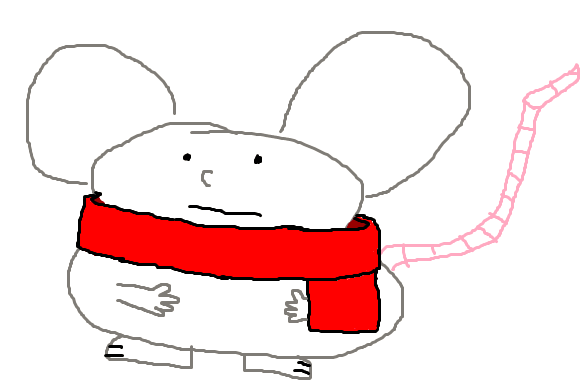